In [1]:
# import libraries & load data
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [3]:
# define the path to the excel file
file_path = r"C:/Users/Home/iCloudDrive/Documents/coding_temple/projects/customer_churn/prediction_data.xlsx"
# define the sheet name to read data from
sheet_name = "vw_ChurnData"

In [5]:
# read data from the specified sheet into a pandas dataframe
data = pd.read_excel(file_path, sheet_name= sheet_name)

In [7]:
# check first rows
print(data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31     Deal 1           Yes             No  ...   
1                 9     Deal 5           Yes             No  ...   
2                28     Deal 1           Yes            Yes  ...   
3                12        NaN           Yes             No  ...   
4                27     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      95.099998   6683.399902          0.00   
1  Bank Wi

In [9]:
# data processing
# drop unused columns in the predictions
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis= 1)

In [11]:
data.columns

Index(['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals',
       'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status'],
      dtype='object')

In [13]:
# list of columns to be encoded (convert categorical columns to numerical)
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
    'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
    'Paperless_Billing', 'Payment_Method'
]

In [15]:
# encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [17]:
# manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

In [19]:
# split data into features and target
X = data.drop('Customer_Status', axis= 1)
y = data['Customer_Status']

In [21]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 123)

In [23]:
# train random forest model
# initialize the random forest classifier
rf_model = RandomForestClassifier(n_estimators= 100, random_state= 123)

In [25]:
# train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [27]:
# evaluate model
# make predictions
y_pred = rf_model.predict(X_test)

In [29]:
# evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[810  50]
 [120 222]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       860
           1       0.82      0.65      0.72       342

    accuracy                           0.86      1202
   macro avg       0.84      0.80      0.81      1202
weighted avg       0.86      0.86      0.85      1202



In [31]:
# feature selection using feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

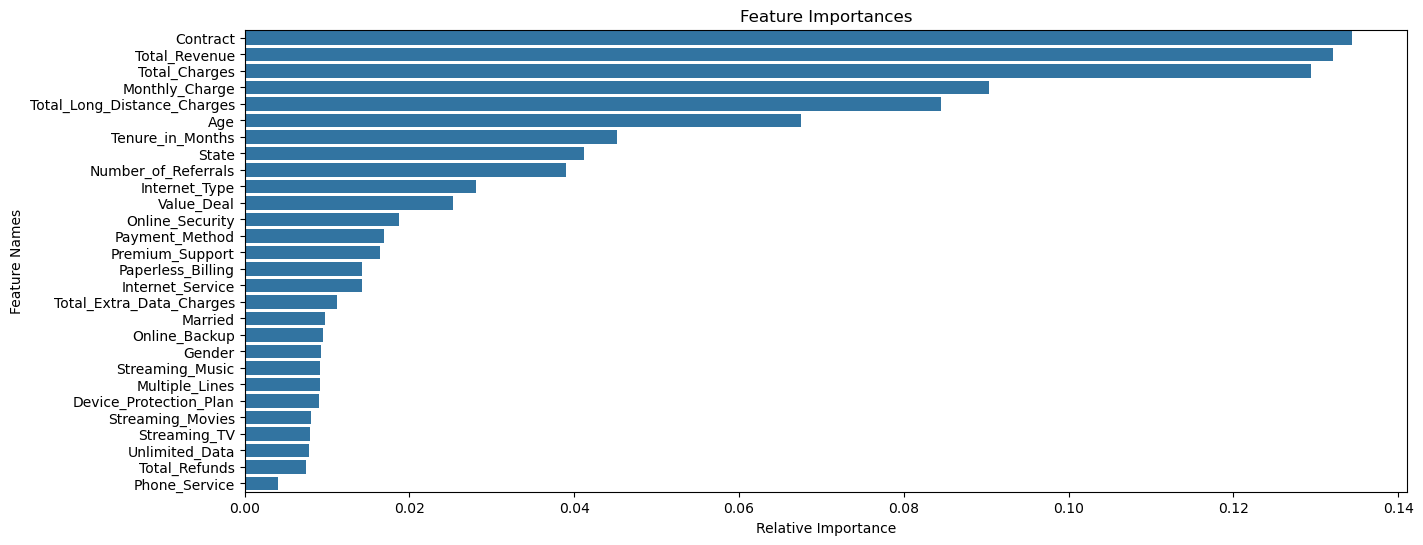

In [33]:
# plot the feature importances
plt.figure(figsize= (15, 6))
sns.barplot(x= importances[indices], y= X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [35]:
# use the model to predict on new data
# define the path to the joiner data file
file_path = r"C:/Users/Home/iCloudDrive/Documents/coding_temple/projects/customer_churn/prediction_data.xlsx"
# define the sheet name to read data from
sheet_name = "vw_JoinData"

In [37]:
# read data from the specified sheet into a pandas dataframenew_
new_data = pd.read_excel(file_path, sheet_name= sheet_name)

In [39]:
# display the first rows of the fetched data
print(new_data.head())

  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   11751-TAM  Female   18      No   Tamil Nadu                    5   
1   12056-WES    Male   27      No  West Bengal                    2   
2   12136-RAJ  Female   25     Yes    Rajasthan                    2   
3   12257-ASS  Female   39      No        Assam                    9   
4   12340-DEL  Female   51     Yes        Delhi                    0   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                20        NaN           Yes             No  ...   
2                35        NaN           Yes             No  ...   
3                 1        NaN           Yes             No  ...   
4                10        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      24.299999     38.450001           0.0   
1  Bank Withdrawal      90.4

In [41]:
# retain the original dataframe to preserve unencoded columns
original_data = new_data.copy()

In [43]:
# retain the customer id column
customer_ids = new_data['Customer_ID']

In [45]:
# drop columns that won't be used for prediction in the encoded dataframe
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis= 1)

In [47]:
new_data.columns

Index(['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals',
       'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue'],
      dtype='object')

In [49]:
# encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include= ['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

In [51]:
# make predictions
new_predictions = rf_model.predict(new_data)

In [53]:
# add predictions to the original dataframe
original_data['Customer_Status_Predicted'] = new_predictions

In [57]:
# filter the dataframe to include only records predicted as 'Churned'
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# save the results
original_data.to_csv(r"C:/Users/Home/iCloudDrive/Documents/coding_temple/projects/customer_churn/predictions.csv", index= False)